In [1]:
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.stats.proportion as smp

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(r"D:\ab_testing_dataset.csv")


In [11]:
df.head()


,user_id,group,visits,converted,time_spent
0,1,Control,1,0,45
1,2,Control,1,1,120
2,3,Control,1,0,60
3,4,Control,1,0,30
4,5,Control,1,1,180


In [21]:
control = df[df["group"] == "Control"]
variant = df[df["group"] == "Variant"]


In [19]:
conversion_rate = df.groupby("group")["converted"].mean()
print("Conversion Rates:\n", conversion_rate)


Conversion Rates:
 group
Control    0.3
Variant    0.7
Name: converted, dtype: float64


In [23]:
contingency_table = pd.crosstab(df["group"], df["converted"])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)


Chi-Square Statistic: 1.8
P-value: 0.17971249487899593


In [25]:
if p_value < 0.05:
    print("Statistically significant difference in conversions")
else:
    print("No statistically significant difference")


No statistically significant difference


In [27]:
successes = df.groupby("group")["converted"].sum()
total = df.groupby("group")["converted"].count()

conf_intervals = smp.proportion_confint(
    count=successes,
    nobs=total,
    method="wilson"
)

ci_df = pd.DataFrame({
    "Lower CI": conf_intervals[0],
    "Upper CI": conf_intervals[1]
}, index=successes.index)

print(ci_df)


         Lower CI  Upper CI
group                      
Control  0.107791  0.603222
Variant  0.396778  0.892209


In [29]:
t_stat, p_val_time = ttest_ind(
    control["time_spent"],
    variant["time_spent"],
    equal_var=False
)

print("T-statistic:", t_stat)
print("P-value:", p_val_time)


T-statistic: -2.658482378217048
P-value: 0.016057858861222955


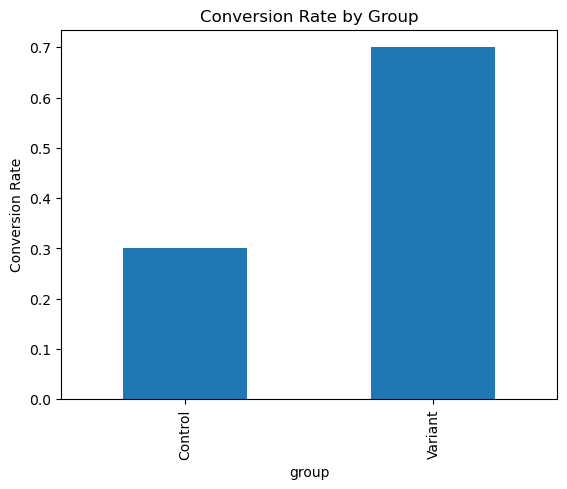

In [31]:
conversion_rate.plot(kind="bar", title="Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()


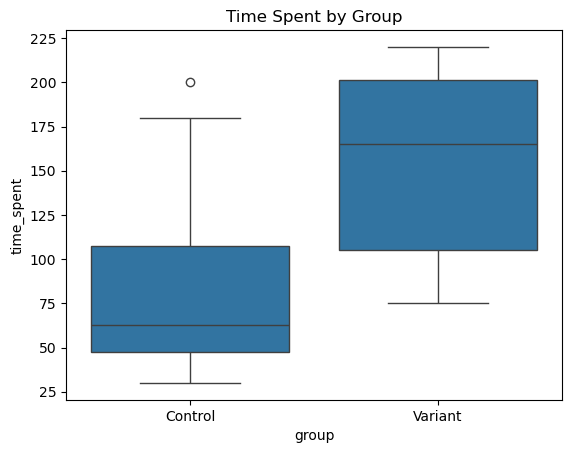

In [33]:
sns.boxplot(x="group", y="time_spent", data=df)
plt.title("Time Spent by Group")
plt.show()


In [35]:
if p_value < 0.05 and conversion_rate["Variant"] > conversion_rate["Control"]:
    print("✅ Recommendation: Implement the new feature (Variant)")
else:
    print("❌ Recommendation: Do not implement the new feature")


❌ Recommendation: Do not implement the new feature
